# Prosper Loan Data Analysis
## _by Imane FENJIROU_

## Preliminary Wrangling

#### Structure of dataset

> The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, from the year 2009-2014. There are two main categories:
* Borrower information:  Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
* Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc.




In [1]:
# Import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Size of graphics
plt.rcParams["axes.grid"] = False
plt.style.use('default')

# sb.set(rc={'figure.figsize':(12,8)})
# plt.rcParams["figure.facecolor"] = "white"
# plt.rcParams["axes.facecolor"] = "white"
# plt.rcParams["savefig.facecolor"] = "white"

> First of all, i will load my dataset and describe its properties

In [2]:
# Load in the dataset into a pandas dataframe
df_loan=pd.read_csv('prosperLoanData.csv')
# Print first five rows of the dataset
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Number of rows and columns of dataset
df_loan.shape

(113937, 81)

In [4]:
# A concise summary of the dataframe,including the number of non-null values in each colum
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Data assessing and cleaning

There are some elements that need to be fixed, in order to create interesting and trustworthy analyses and visualizations.

In [5]:
# Define features of interest for this analysis
features = ['ListingNumber','ListingCreationDate','ProsperRating (Alpha)','ProsperScore',\
            'ListingCategory (numeric)', 'Occupation','EmploymentStatus', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus', \
            'CreditScoreRangeLower', 'CreditScoreRangeUpper','BorrowerState', \
            'LoanOriginationDate', 'IncomeRange','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','Term']


In [6]:
# New subdataset
df_selected=df_loan[features]
df_selected.head()

,ListingNumber,ListingCreationDate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,...,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
0,193129,2007-08-26 19:09:29.263000000,NaN,NaN,0,Other,Self-employed,True,5.0,1,...,Completed,640.0,659.0,CO,2007-09-12 00:00:00,"$25,000-49,999",0.16516,0.1580,3083.333333,36
1,1209647,2014-02-27 08:28:07.900000000,A,7.0,2,Professional,Employed,False,14.0,13,...,Current,680.0,699.0,CO,2014-03-03 00:00:00,"$50,000-74,999",0.12016,0.0920,6125.000000,36
2,81716,2007-01-05 15:00:47.090000000,NaN,NaN,0,Other,Not available,False,NaN,0,...,Completed,480.0,499.0,GA,2007-01-17 00:00:00,Not displayed,0.28269,0.2750,2083.333333,36
3,658116,2012-10-22 11:02:35.010000000,A,9.0,16,Skilled Labor,Employed,True,5.0,7,...,Current,800.0,819.0,GA,2012-11-01 00:00:00,"$25,000-49,999",0.12528,0.0974,2875.000000,36
4,909464,2013-09-14 18:38:39.097000000,D,4.0,2,Executive,Employed,True,19.0,6,...,Current,680.0,699.0,MN,2013-09-20 00:00:00,"$100,000+",0.24614,0.2085,9583.333333,36


In [7]:
# A concise summary of the dataframe,including the number of non-null values in each colum
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   ProsperRating (Alpha)      84853 non-null   object 
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   Occupation                 110349 non-null  object 
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   CurrentCreditLines         106333 non-null  float64
 9   OpenRevolvingAccounts      113937 non-null  int64  
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeVerifiable           113937 non-null  bool   
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanStatus                 11

In [8]:
# Count total rows in each column which contain null values
df_selected.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentCreditLines            7604
OpenRevolvingAccounts            0
DebtToIncomeRatio             8554
IncomeVerifiable                 0
LoanOriginalAmount               0
LoanStatus                       0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
BorrowerState                 5515
LoanOriginationDate              0
IncomeRange                      0
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
Term                             0
dtype: int64

In [9]:
# Check for duplicates in the data
sum(df_selected.duplicated())

0

In [10]:
# According to my preliminary analysis, ProsperRating is the most important feature of this dataset
#so i will select only not null rows 
df_selected=df_selected[df_selected['ProsperRating (Alpha)'].notnull()]

In [11]:
# Filling missing values with mean
df_selected['DebtToIncomeRatio']=df_selected['DebtToIncomeRatio'].fillna(df_selected['DebtToIncomeRatio'].mean())

In [12]:
# Filling missing values 
df_selected['Occupation']=df_selected['Occupation'].fillna('Unknown')

In [13]:
# Returns the number of unique in the dataset
df_selected.nunique()

ListingNumber                83982
ListingCreationDate          83980
ProsperRating (Alpha)            7
ProsperScore                    11
ListingCategory (numeric)       20
Occupation                      68
EmploymentStatus                 7
IsBorrowerHomeowner              2
CurrentCreditLines              51
OpenRevolvingAccounts           46
DebtToIncomeRatio              260
IncomeVerifiable                 2
LoanOriginalAmount            1934
LoanStatus                      11
CreditScoreRangeLower           15
CreditScoreRangeUpper           15
BorrowerState                   48
LoanOriginationDate           1165
IncomeRange                      7
BorrowerAPR                   2330
BorrowerRate                  1229
StatedMonthlyIncome           9445
Term                             3
dtype: int64

In [14]:
# Check unique loan status Status
df_selected.LoanStatus.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [15]:
# Check unique Employment Status
df_selected.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [16]:
# Convert 'ListingCreationDate' type from str to datetime 
df_selected['ListingCreationDate']=pd.to_datetime(df_selected['ListingCreationDate'])

# Extract date information from ListingCreationDate column
df_selected['date'] = df_selected['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
df_selected['year']= df_selected['ListingCreationDate'].dt.year

# Extract month information from ListingCreationDate column
df_selected['month'] = df_selected['ListingCreationDate'].dt.month

# Convert 'date' type from str to datetime 
df_selected['date']=pd.to_datetime(df_selected['date'])
# df_selected['year']=pd.to_datetime(df_selected['year'])

# Drop unused column
df_selected.drop(['ListingCreationDate'], axis=1, inplace=True)

In [17]:
# Replacing numerical values of month with names
df_selected['month'].unique()

array([ 2, 10,  9, 12,  4,  5,  7,  8, 11,  1,  6,  3], dtype=int64)

In [18]:
# Convert 'Month' type  to str
df_selected['month']=df_selected['month'].astype(str)
# replacing numerical values of month with month names
df_selected.month=df_selected.month.replace([ '1', '2','3','4','5','6','7','8', '9','10','11','12'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

# check the correction
df_selected['month'].unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [19]:
# Convert 'LoanOriginationDate' type from str to datetime 
df_selected['LoanOriginationDate']=pd.to_datetime(df_selected['LoanOriginationDate'])

In [20]:
df_selected['ListingNumber']=df_selected['ListingNumber'].astype(str)

In [21]:
df_selected['ProsperScore']=df_selected['ProsperScore'].astype(int)

In [22]:
df_selected['ListingCategory (numeric)'].unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  3,  8, 11, 14,  9, 17, 10,
        0,  5, 12], dtype=int64)

In [23]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_selected['ListingCategory'] = df_selected['ListingCategory (numeric)'].map(list_dict)
df_selected.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [24]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df_selected['ProsperRating'] = df_selected['ProsperRating (Alpha)'].astype(ordered_var)

In [25]:
# calcute averge Credit Score Range
df_selected['CreditScore_average'] = (df_selected['CreditScoreRangeLower'] + df_selected['CreditScoreRangeUpper'])/2

In [26]:
# Numerical variables
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']

In [27]:
# Confirm correction by recheking info function
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          84853 non-null  object        
 1   ProsperRating (Alpha)  84853 non-null  object        
 2   ProsperScore           84853 non-null  int32         
 3   Occupation             84853 non-null  object        
 4   EmploymentStatus       84853 non-null  object        
 5   IsBorrowerHomeowner    84853 non-null  bool          
 6   CurrentCreditLines     84853 non-null  float64       
 7   OpenRevolvingAccounts  84853 non-null  int64         
 8   DebtToIncomeRatio      84853 non-null  float64       
 9   IncomeVerifiable       84853 non-null  bool          
 10  LoanOriginalAmount     84853 non-null  int64         
 11  LoanStatus             84853 non-null  object        
 12  CreditScoreRangeLower  84853 non-null  float64       
 13  

In [28]:
# Print descriptive statistics for the column selected
df_selected[['CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']].describe()

,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome,BorrowerAPR,BorrowerRate
count,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000
mean,10.508032,7.386292,0.258752,9083.440515,5.931175e+03,0.226658,0.196022
std,5.317401,4.515977,0.304333,6287.860058,8.239944e+03,0.079916,0.074631
min,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.045830,0.040000
25%,7.000000,4.000000,0.160000,4000.000000,3.434000e+03,0.163280,0.135900
50%,10.000000,7.000000,0.240000,7500.000000,5.000000e+03,0.219450,0.187500
75%,13.000000,10.000000,0.310000,13500.000000,7.083333e+03,0.292540,0.257400
max,59.000000,50.000000,10.010000,35000.000000,1.750003e+06,0.423950,0.360000


### What is the structure of your dataset?

> The dataset contains 84853 loans with 27 features, including ProsperScore, DebtToIncomeRatio,	LoanOriginalAmount	BorrowerAPR	BorrowerRate, Term and many others. Most variables are numeric and categorical in nature.


### What is/are the main feature(s) of interest in your dataset?

> As a potentiel borrower, I'm interested especially in figuring out:
* What are the main factors affecting the interest rate? What's the average interest rate on big loans? What's the interest rate applied for small loans?
* what size of loans do borrowers usually take out from Prosper? Who takes big loans? Who takes small loans?
* Are there any differences between loans depending on different level of employment status?
* Which category of listing takes the most loans and for what purpose?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many features to explore, I suppose that the following borrower features would have the largest effect on interest rate:
* IncomeRange - The income range of the borrower at the time the listing was created.
* DebToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. 
* Creditscore - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
* ProsperRating - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
* Collateral:A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* Employment status......

> Please note that it is not an exhaustive list of interest rate and loans determinant. Additional features might be required, as well as a deeper understanding of the decisions made by Prosper top management.


## Univariate Exploration

> In this section, i will investigate distributions of some variables of interest. 

### Loan Status

I will begin by plotting the loan status to get an idea of this variable's distribution.

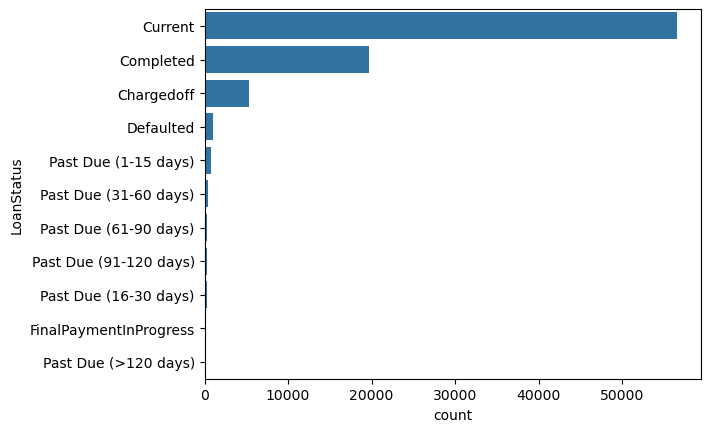

In [29]:
# Plot loan status
color_base=sb.color_palette()[0]

# Order the categorical variable 
status_order=df_selected.LoanStatus.value_counts().index

# Plot 
sb.countplot(data=df_selected, y='LoanStatus', order=status_order, color=color_base);

_**Notes**_

Since we have a lot of category, i will aggregate some variables such as 'Past Due' which differs only in maturity.

In [30]:
# Aggregate Past Due loans 
df_selected['LoanStatus'] = df_selected['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status_order = pd.api.types.CategoricalDtype(ordered = True, categories = status_dict)

df_selected['LoanStatus'] = df_selected['LoanStatus'].astype(loan_status_order)

After aggregation, i will print the proportion of loans in each status.

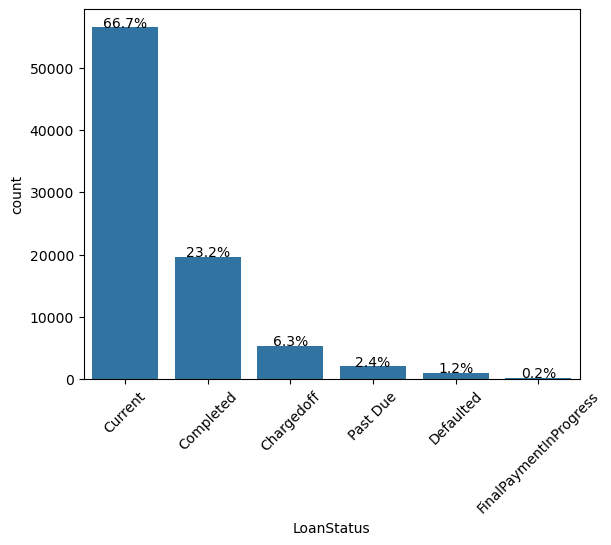

In [31]:
# Print the proportion below the bars 
n_loans=df_selected['LoanStatus'].value_counts().sum()
status_count=df_selected['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sb.color_palette()[0]
sb.countplot(data=df_selected, x='LoanStatus', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

_**Notes**_

More than 80% of all Prosper loans are either current or completed (good profiles). Among them, almost 67% are current and being paid by Prosper's borrowers. However, about 8% of Prosper's loans were charged-off or defaulted. Moreover, the remaining 2.4% of loans has the status Past Due and was grouped under a single status: Past Due.

### Prosper's borrowers risk

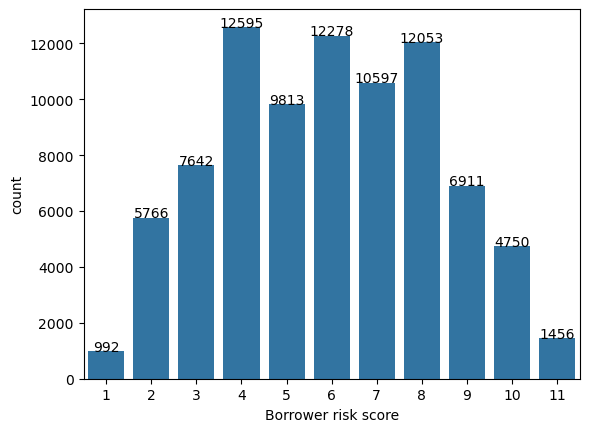

In [32]:
#Plot ordinal variable distribution 'ProsperScore'
sb.countplot(data=df_selected, x='ProsperScore', color=base_color);
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df_selected['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

_**Notes**_

Prosper Score was built using historical Prosper data to assess the risk of Prosper borrower listings. It ranges from 1 to 11, with 11 being the lowest risk, to 1 being the highest risk.

The figure above shows Prosper Score has a bell-shaped distribution spiking on Score with 4,6,8, and fewer counts with scores in both lowest and highest risk among the Prosper data.

### Prosper credit rating

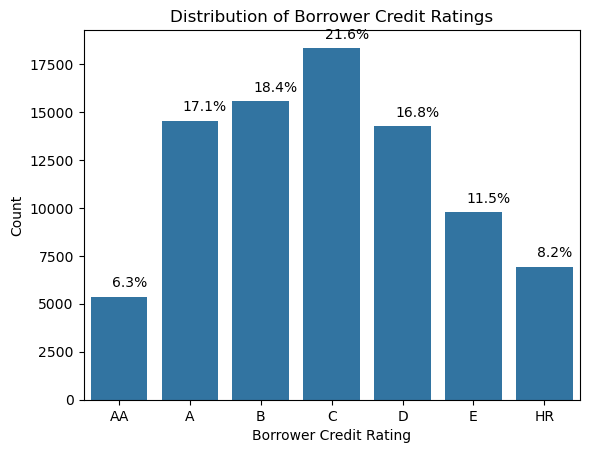

In [33]:
#Plot ordinal variable distribution 'ProsperRating'
sb.countplot(data = df_selected, x = 'ProsperRating', color = color_base)
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');
rating_counts = df_selected['ProsperRating'].value_counts()
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

_**Notes**_

We can notice that the highest frequency from a C Prosper Rating (making up for 21.6% of the total number of loans) and the lowest frequency from the AA Prosper Rating loans(6.3%).

### Debt to Income Ratio

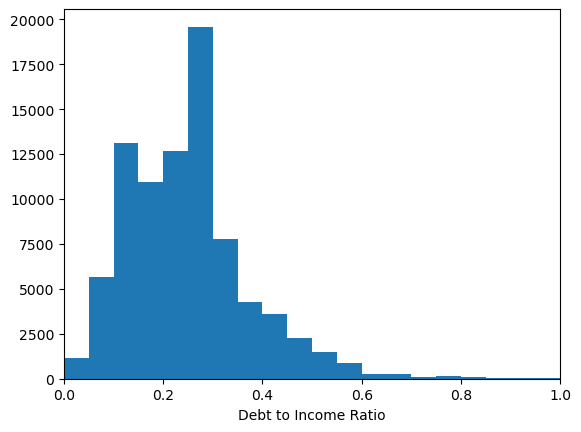

In [34]:
# Plot DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, df_selected['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df_selected, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

_**Notes**_

In general, higher Debt To Income Ratio demonstrates that an individual has too much debt for the amount of income. Inversely, lower DebtToIncomeRatio means a good balance between debt and income.
It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 30%.

### Employment Status

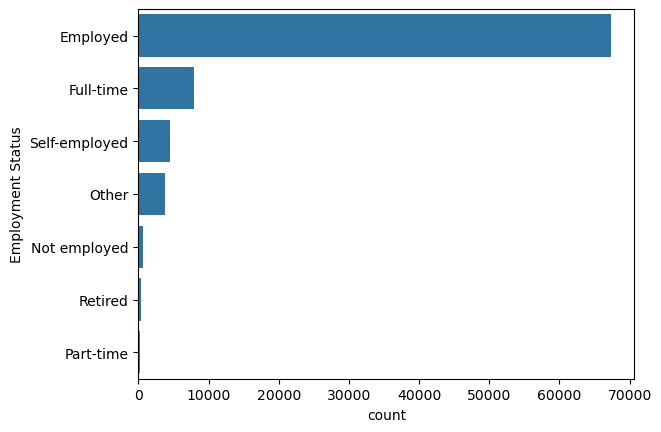

In [35]:
# Plot EmploymentStatus
status_empl=df_selected.EmploymentStatus.value_counts().index
sb.countplot(data=df_selected, y='EmploymentStatus', order=status_empl, color=color_base)
plt.ylabel('Employment Status');

_**Notes**_

The majority of borrowers are employed, which is evident because it wouldnt be easy to get a loan without a job. To dig further, i will investigate in the next part what are their occupations.

### Occupation (sized by frequency)

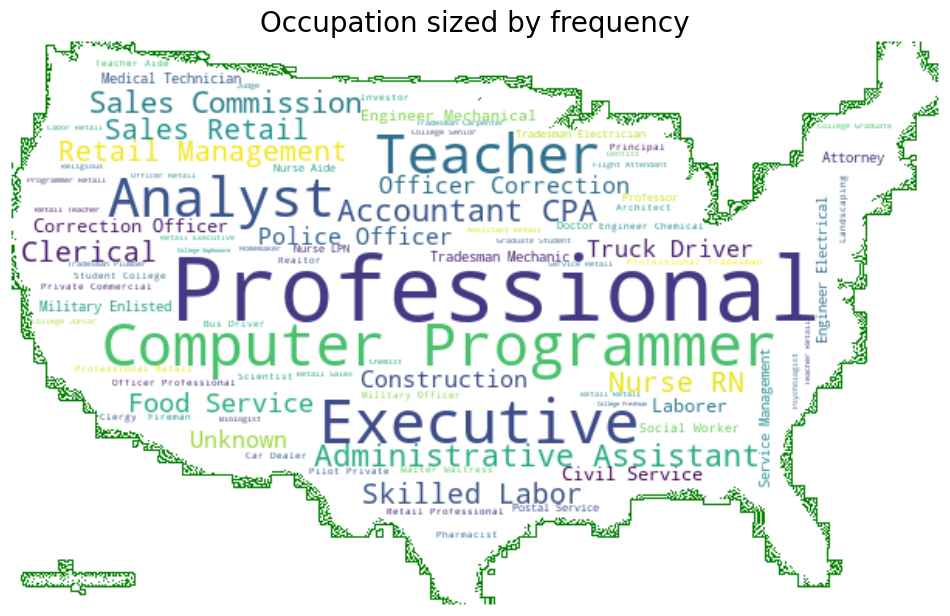

In [36]:
# Occupation sized by frequency
# Wordcloud 
text = df_selected.loc[:, 'Occupation'].str.cat(others=None, sep=' ')

# Read the mask image
usa_mask = np.array(Image.open('usa.jpg'))

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=200, mask=usa_mask, stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='green')
# Generate word cloud
wc.generate(text)
# Show word cloud
plt.figure(figsize = [12, 8])
plt.imshow(wc, interpolation='bilinear')
plt.title('Occupation sized by frequency', fontsize=20)
plt.axis('off');

_**Notes**_

Most borrowers on Prosper indicate to be Professional, Computer Programmer, Administrative Assistant, Executive, Teacher, Analyst... All those people have chosen to borrow on Prosper instead of going to the conventional way and borrow from their commerciaL bank. This is could be due to an attractive interest rate offered for this categories of people.
That what we will going to see later.

### Loan categories

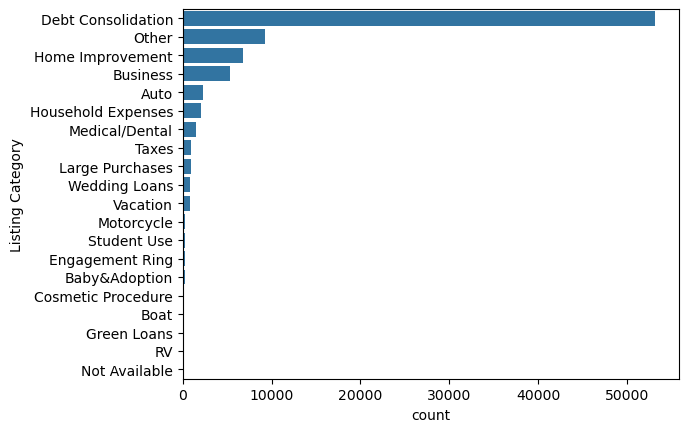

In [37]:
# loan purpose by category
categ_order = df_selected['ListingCategory'].value_counts().index
listing_counts = df_selected['ListingCategory'].value_counts()
sb.countplot(data = df_selected, y = 'ListingCategory', color = color_base, order=categ_order)
plt.ylabel('Listing Category');


_**Notes**_

Debt consolidation won by a very huge amount. It is the most popular type of Prosper's loans. It's not really surprising!
Business and some Personal loans are other notable categories in the loans by Listing Categories.

### Loan Original Amount

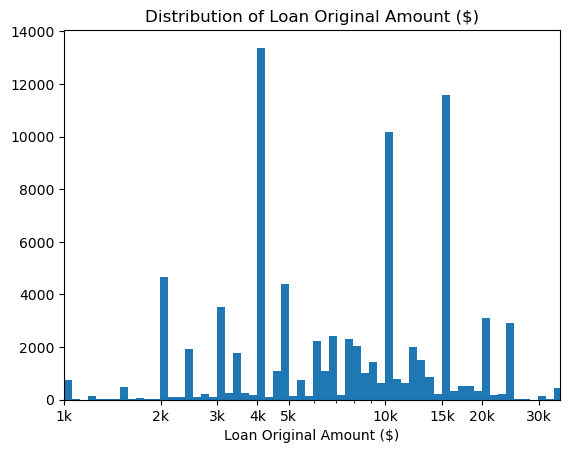

In [38]:
# plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df_selected['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df_selected, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

_**Notes**_

As we can see, there are three peaks at 4K, 10K, and 15K. It seems that these three loan sizes are the most common ones that people took out.

### Term of Loans

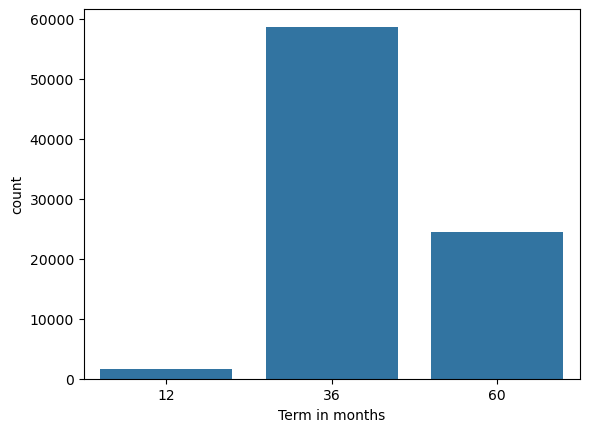

In [39]:
# Plot term of loans
sb.countplot(data=df_selected, x='Term', color=color_base)
plt.xlabel('Term in months');

_**Notes**_

We have short term loans: 1 year, Medium term loans 3  and 5 years. The most common type is a 3-year loan (medium term) followed by 5 year loan. The short term loan is very rare. 

### Wage Group

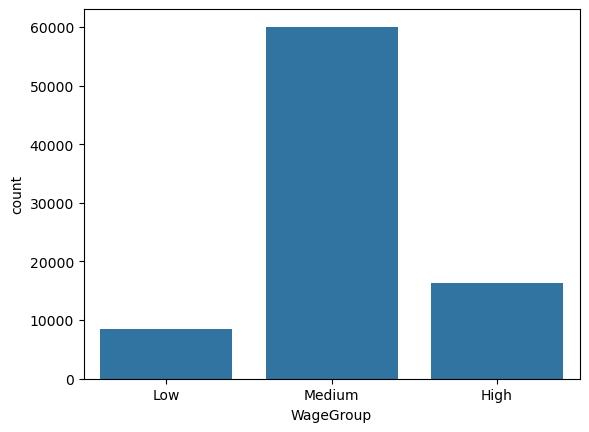

In [40]:
# define a classification function
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
df_selected['WageGroup'] = df_selected.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Low', 'Medium', 'High']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df_selected['WageGroup'] = df_selected['WageGroup'].astype(ordered_variabl)

# Plot the new variable
sb.countplot(data = df_selected, x = 'WageGroup', color = color_base);

The majority of people who have taken out credit are in the middle class and have an average monthly salary between 2500 dollars and 8000 dollars.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The loan original amount variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data have three peaks at 4K, 10K, and 15K. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of my cleaning efforts and adjustment were on ordering factors levels to make more intuitive sense.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data. I will investigate the relationships between numerical variables to see if any particular pairs have strong correlations.

In [41]:
# Numerical features
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']

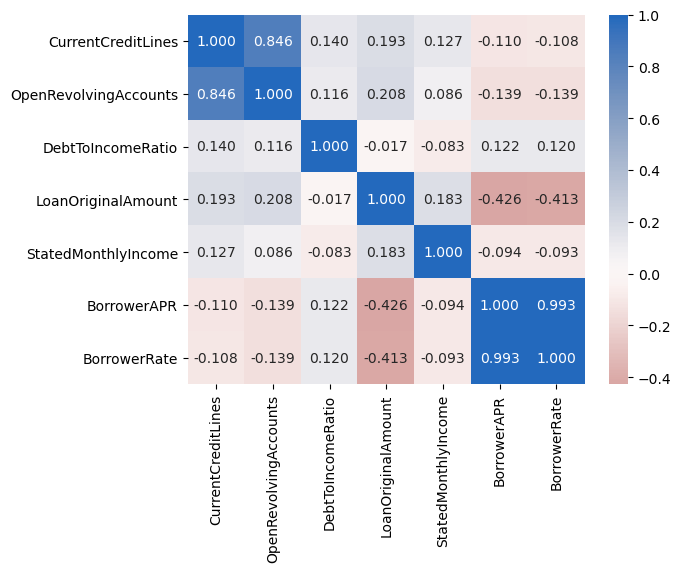

In [42]:
# correlation plot
sb.heatmap(df_selected[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0)
plt.show()

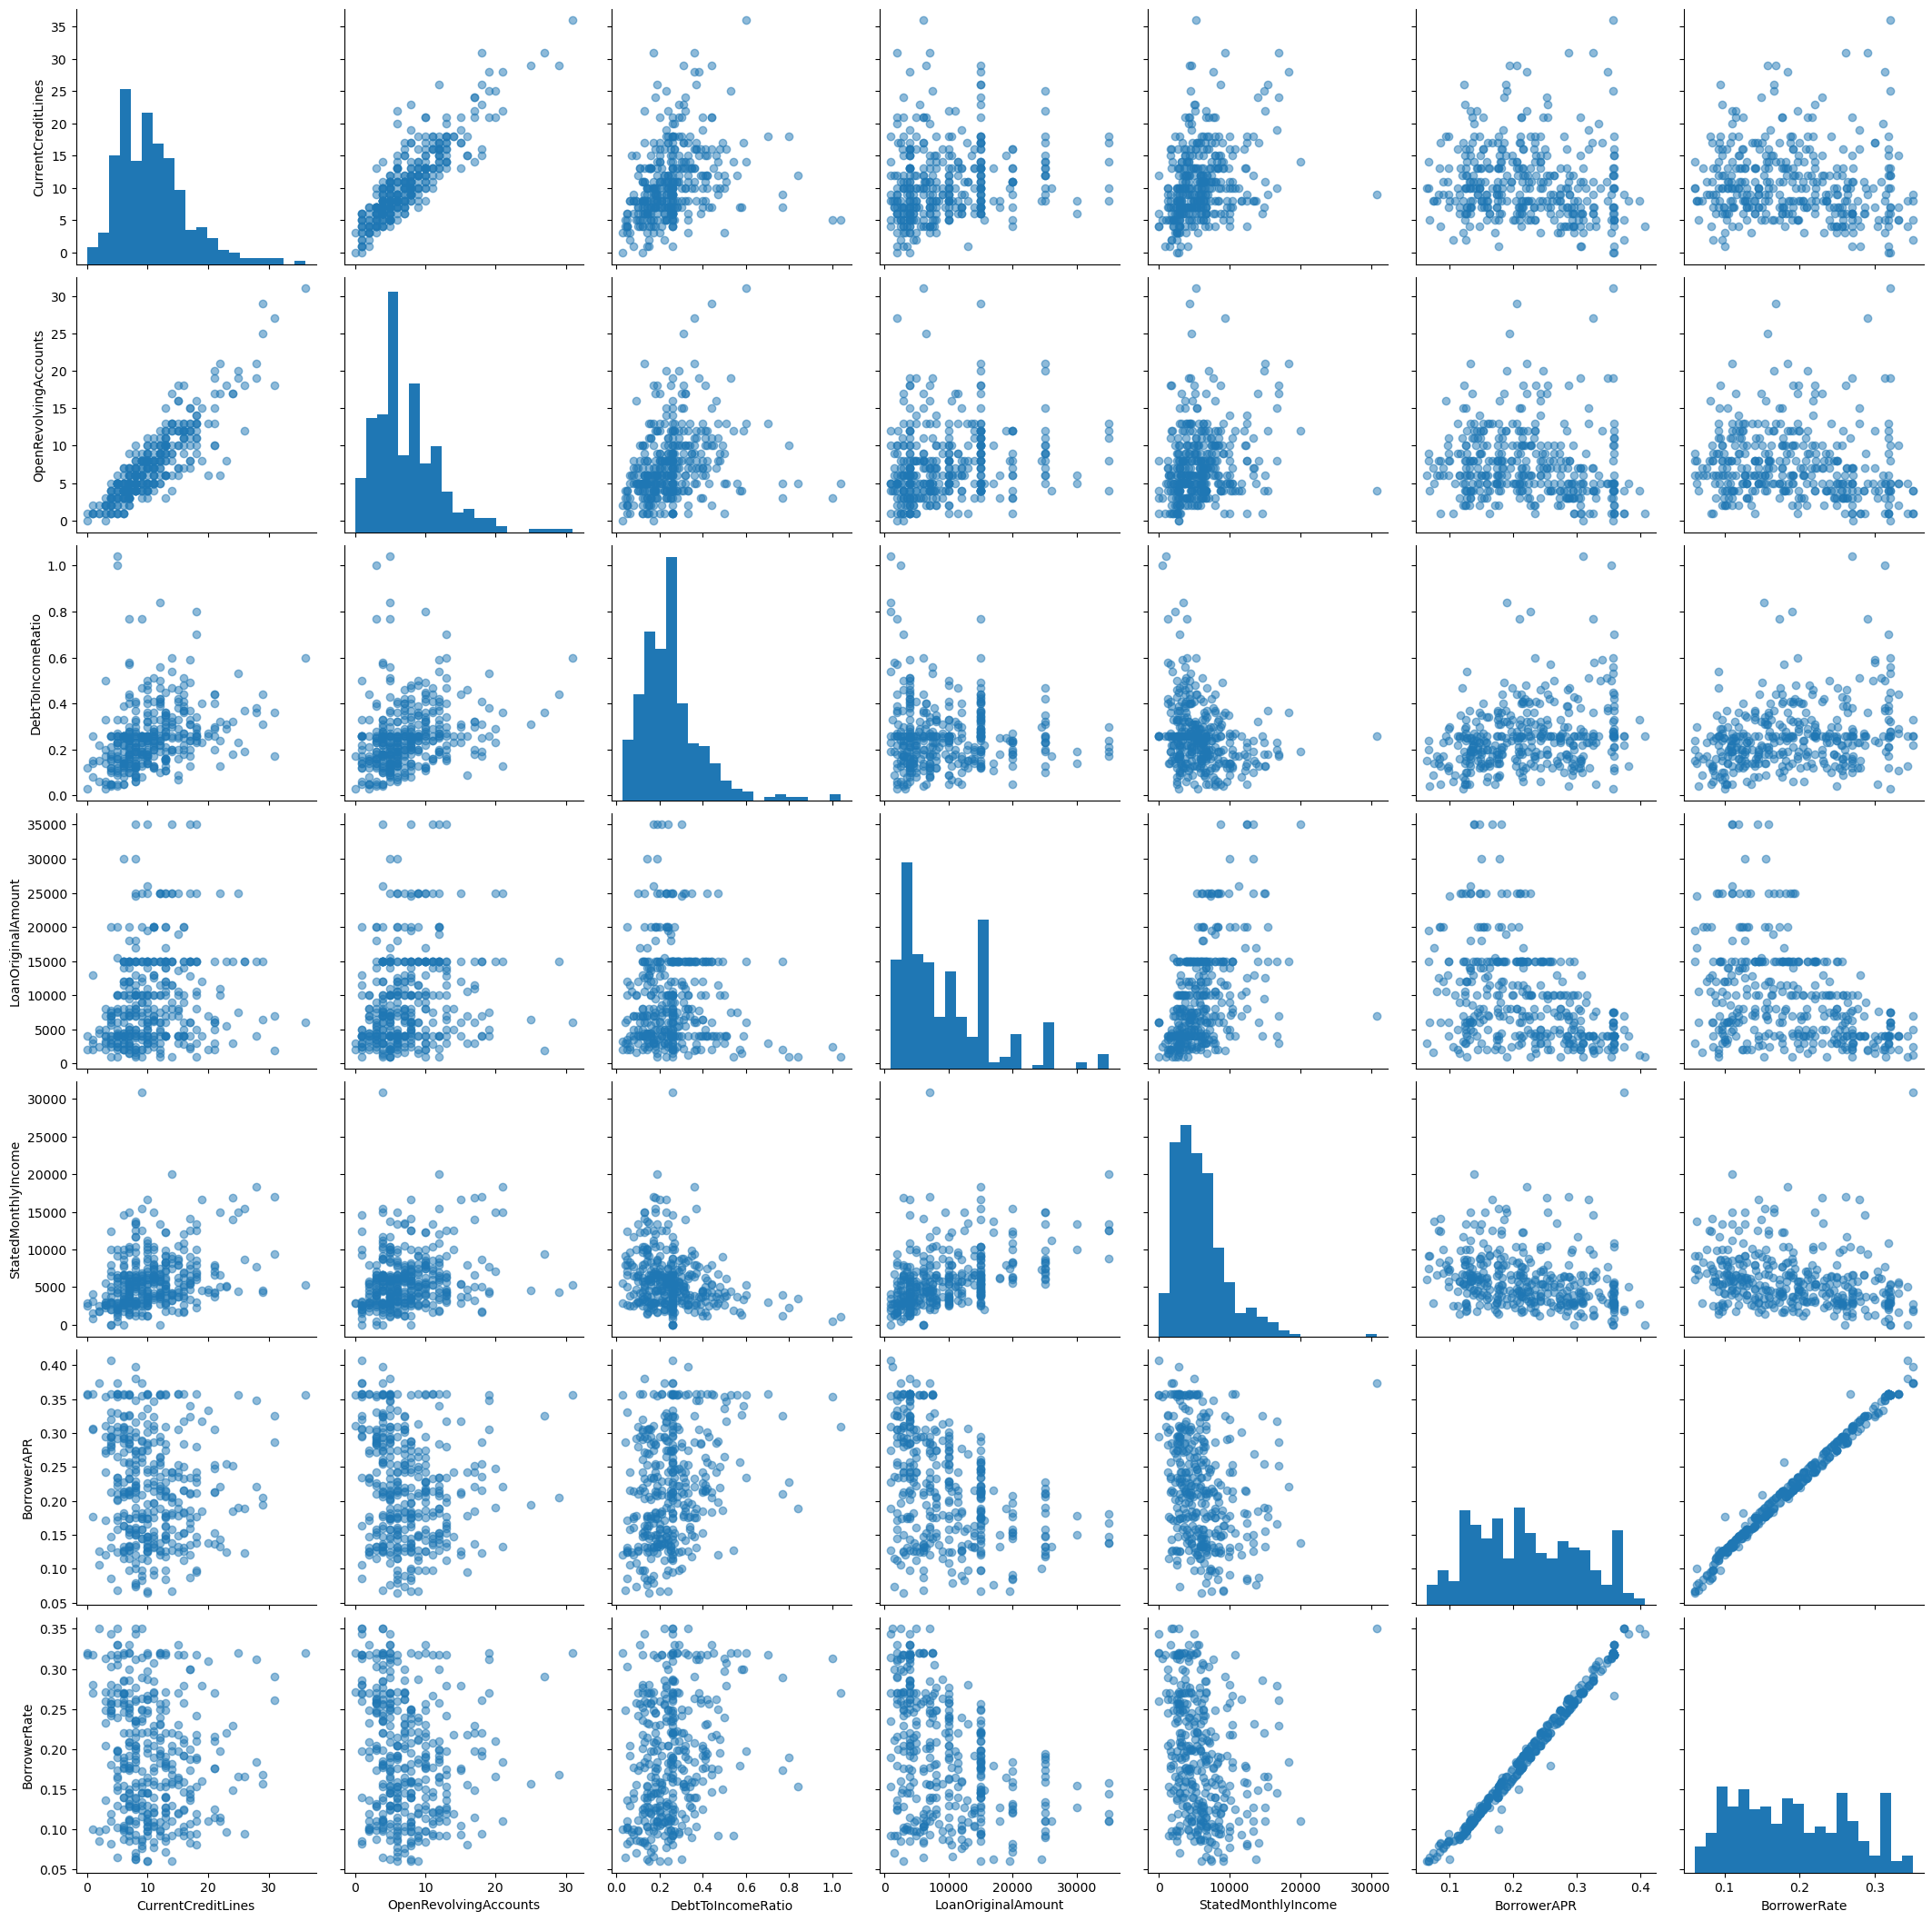

In [43]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(df_selected.shape[0], 500, replace = False)
df_samp = df_selected.reindex(samples)

# pair grid
g = sb.PairGrid(data = df_samp, vars = numeric_vars, size = 3)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);


_**Notes**_

- As expected, the CurrentCreditLines and OpenRevolvingAccounts are highly and positively correlated with one another .The second strong relationship is between BorrowerRate and Borrower APR (correlation coefficient of 0.993). 

- Moreover, there is a moderate and negative correlation between interest rate and Loan amount. 

- On the other hand, most of the remaining variables doesn't present a strong correlation.

Let's move on to look at how these numerical variables correlate with the categorical and ordinal variables.

### Relation between Borrower Rate and employment status, Collatera and Wage Group

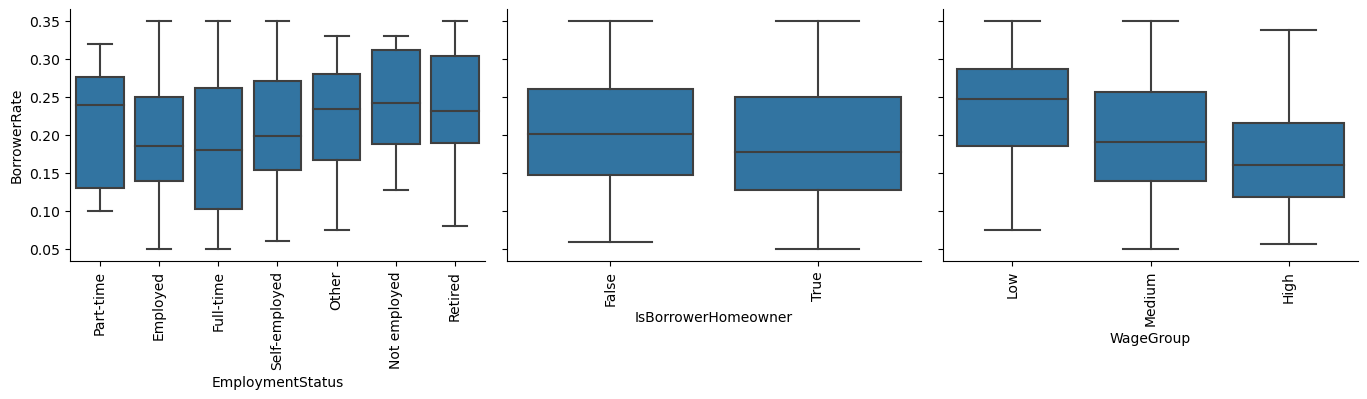

In [44]:
# plot matrix of numeric features against categorical/ordinal features.
# use a 2000 sample since there are fewer plots and they're simpler in nature.
df_samp = df_selected.sample(2000, replace=False)

#define boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);


g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner','WageGroup'],
                size = 3, aspect = 1.5);
g.map(boxgrid);

_**Notes**_

As expected, it appears that there are some negative relationships between the categorical/ordinal variables selected and the interest rate. 
Unemployed people have mopre restrictive credit condition (higher rate) than the people who have jobs. 

The second observation is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house).

Similarly, borrowers with higher monthly salaries tend to get a lower lending interest rate. So it's a good determinant as well.

### Relation between Borrower Rate and Prosper Score, Prosper Rating

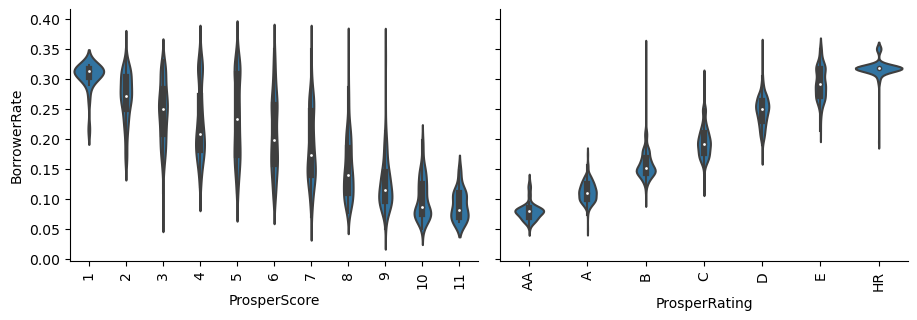

In [45]:
#define violin function
def violin(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)
    plt.xticks(rotation=90);
    
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = ['ProsperScore','ProsperRating'],
                size = 3, aspect = 1.5);
g.map(violin);

_**Notes**_

Not surprisingly, there is a strong indication that the Prosper score is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate.
In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!

### Relation between Borrower APR (Annual Cost) and some categorical variables

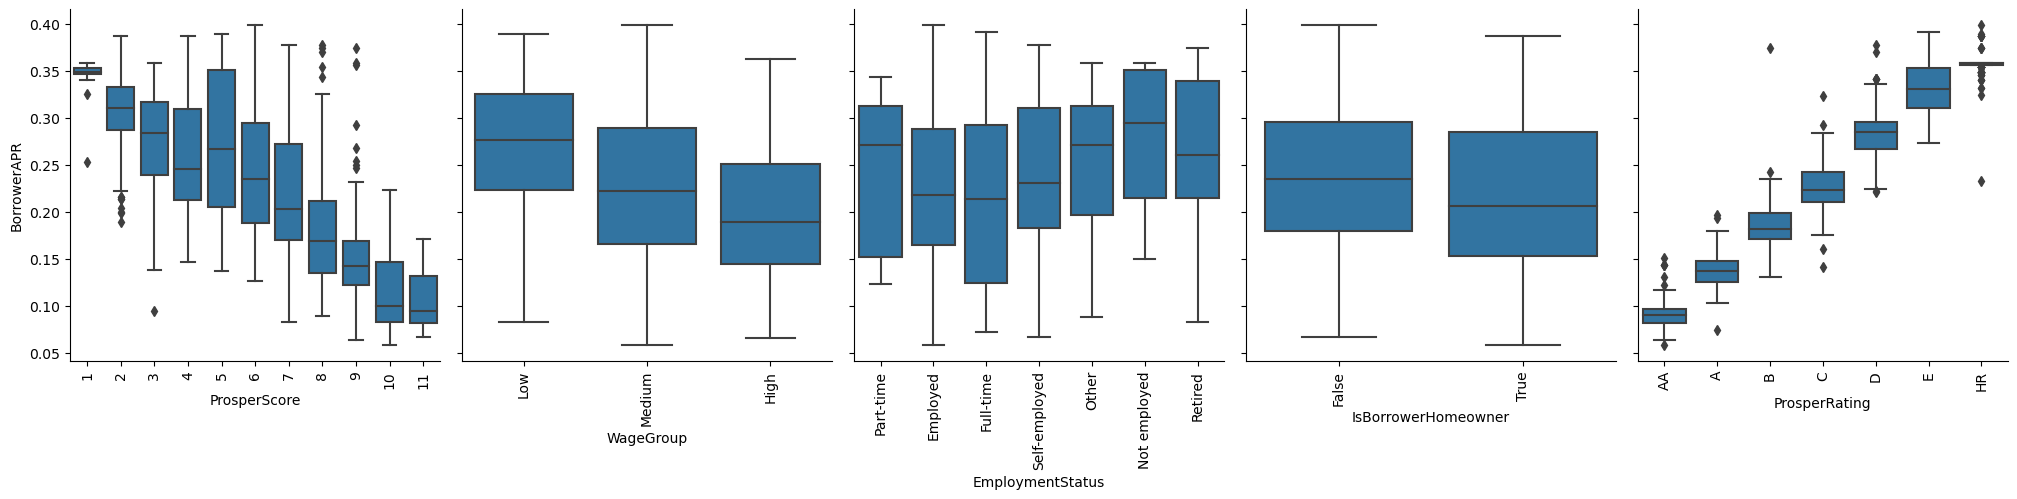

In [46]:
#plot multiple figures with Pairgrid
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR'], 
                x_vars = ['ProsperScore','WageGroup','EmploymentStatus','IsBorrowerHomeowner', 'ProsperRating'], size = 4)
g.map(boxgrid)
plt.show();

_**Notes**_ 

The same conclusion can be deduced from the figures above. There is a strong relation between the annual cost of a loan to a borrower and prosper score&rating, salary, employment and collateral. 

### Evolution of Borrower rate over years

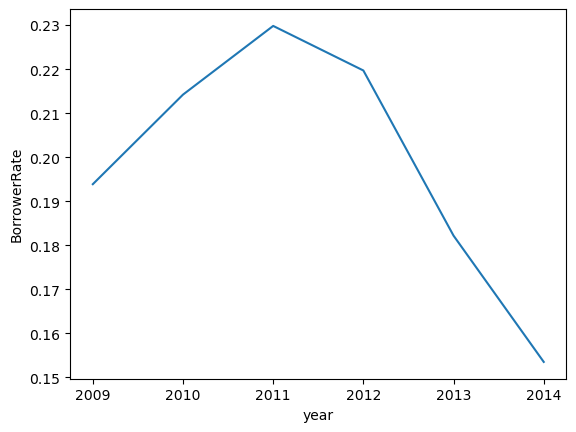

In [47]:
# plots the pointplot for year vs BorrowerRate
sb.lineplot(data=df_selected, x='year', y='BorrowerRate', ci=None);

_**Notes**_

I was currious about the evolution over time of the interest rate. The figure above shows that the borrower rate increased significantly in 2011 before experiencing a downward trend observed since 2012.

### LoanStatus vs ListingCategory

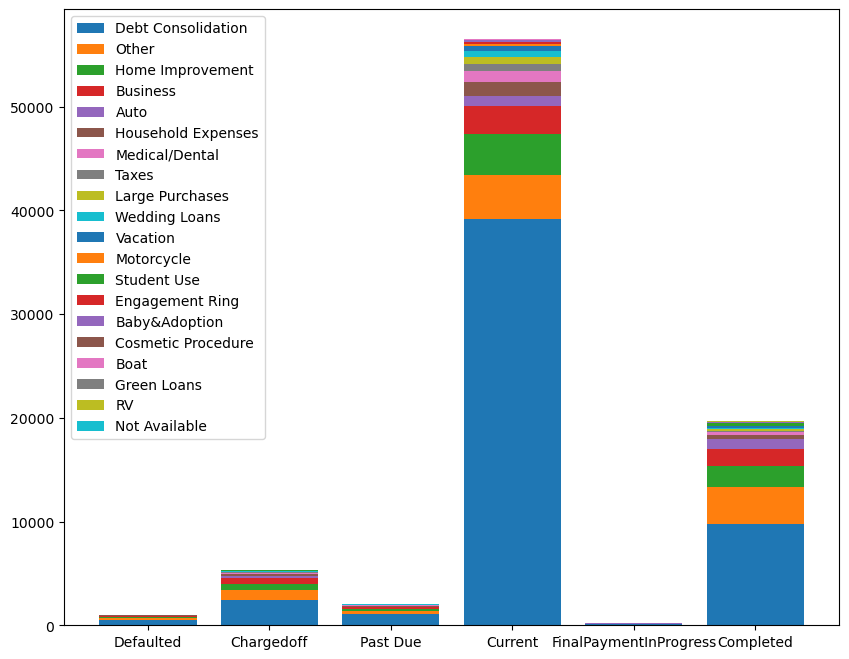

In [48]:
baselines = np.zeros(len(status_dict))
plt.figure(figsize = [10, 8])
# for each second-variable category:
for i in range(len(categ_order)):
# isolate the counts of the first category,
    listing_cat = categ_order[i]
    inner_counts = df_selected[df_selected['ListingCategory'] == listing_cat]['LoanStatus'].value_counts()
# then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(status_dict)), height = inner_counts[status_dict],
            bottom = baselines)
    baselines += inner_counts[status_dict]

plt.xticks(np.arange(len(status_dict)), status_dict)
plt.legend(categ_order);

_**Notes**_

The majority of current listing are Debt Consolidation. We can also observe the same profile for the Completed loans. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The objective of this work is to investigate factors affecting borrower rate and loan amount:
- There is a moderate and negative correlation between interest rate and Loan amount.
- I found also that there are some negative and strong relationships between the categorical/ordinal variables selected and the interest rate. As an example, Unemployed people have more restrictive credit condition (higher rate) than the people who have jobs. The second factor is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house).The third determinant is that borrowers with higher monthly salaries tend to get a lower lending interest rate. So it's a good determinant as well.
- Similarly, there is a strong indication that the Prosper score and rating is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate. In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!


## Multivariate Exploration

> In this section, i am going to dig deeper by Creating plots of three or more variables to investigate the determinant of interest rate and loans even further. 

### Borrower Rate and Average Credit Score by delinquency Status

In [49]:
#Create a new column which return 1 for good status of payment('Current','Completed','FinalPaymentInProgress') 
# and 0 if there is an issue (defaulted,past due, charged-off payments)

status_good=['Current','Completed','FinalPaymentInProgress']
def cat_Loanstatus(row):
    for i in status_good:
        if i in row:
            return 1
    return 0
df_selected["loanstatus_cat"] = df_selected.LoanStatus.apply(lambda x: cat_Loanstatus(x))

In [50]:
status = df_selected.groupby('loanstatus_cat').agg({'CreditScore_average':'mean','BorrowerRate':'mean'})
status = status.reset_index()
status["loanstatus_cat"].replace({0: "Delinquent", 1: "Good"}, inplace=True)
status = status.sort_values(['CreditScore_average'],ascending=False).head(10)
status

,loanstatus_cat,CreditScore_average,BorrowerRate
1,Good,710.174472,0.189706
0,Delinquent,697.214082,0.253447


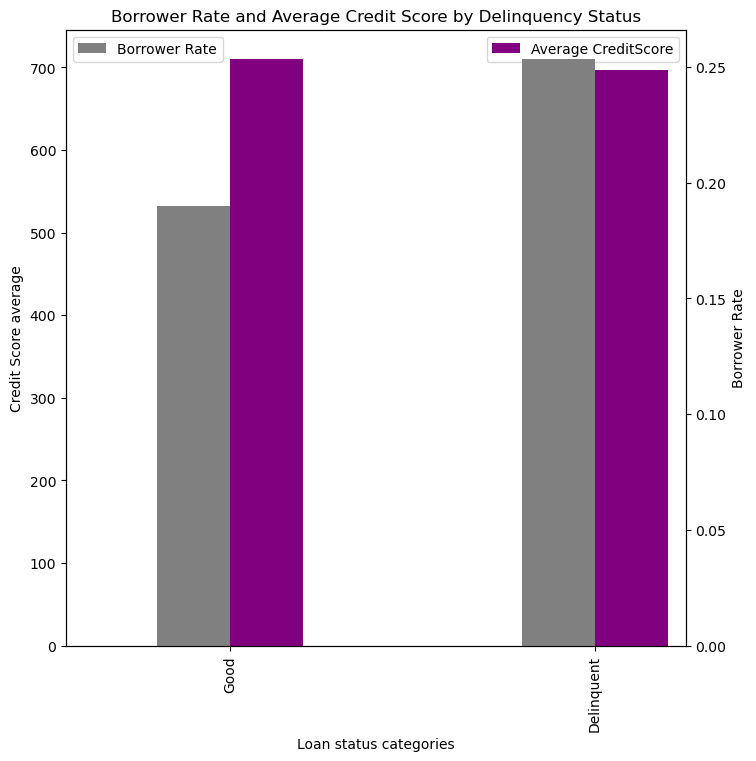

In [51]:
# Create a figure
fig = plt.figure(figsize=(8,8))
# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes 
ax2 = ax.twinx()

width = 0.20
CreditScore_average = status.plot(x='loanstatus_cat', y='CreditScore_average', kind='bar', color = 'purple',
                   width=width,ax=ax, position = 0, label = 'Average CreditScore')
BorrowerRate = status.plot(x='loanstatus_cat', y='BorrowerRate', kind='bar', color = 'gray',
                  width=width,ax=ax2, position = 1,  label = 'Borrower Rate')

ax.set_ylabel('Credit Score average')
CreditScore_average.legend(loc='upper right')
ax2.set_ylabel('Borrower Rate')
ax2.legend(loc='upper left')
ax.set_xlabel('Loan status categories')
plt.title('Borrower Rate and Average Credit Score by Delinquency Status');


_**Notes**_

Its clear now that for people who are delinquent (defaulted,past due, charged-off payments), banks applies more restricted credit conditions (higher interest rates). Also these people have lower credit scores than people with good status.

### Evolution of BorrowerRate over years for Homeowners & Non-Homeowners

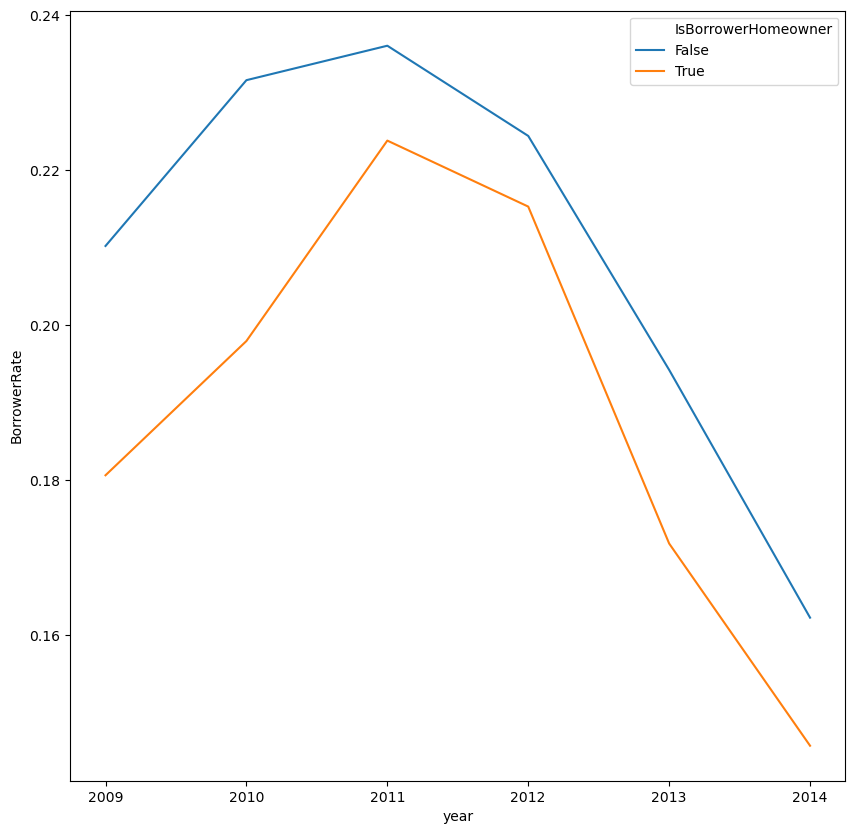

In [52]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
g=sb.lineplot(data=df_selected, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner',ci=None);

_**Notes**_

As we can see, the two rates have had the same evolution profile. As expected, rates for individuals with collateral(homeowner) are lower than those without collateral, but the gap between the two rates has decreased significantly since 2011.

### Borrower Rate by Prosper rating and Loan terms

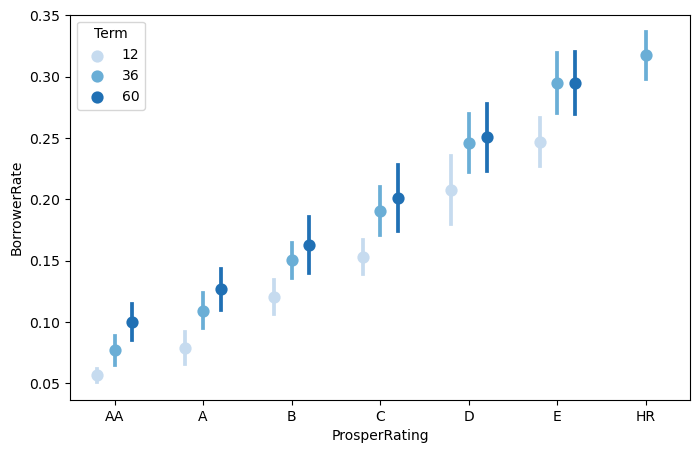

In [53]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = df_selected, x = 'ProsperRating', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')

_**Notes**_

We note that the rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the E rating (same rates for 3 and 5 years loans ) and the HR rating).
This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. 
Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating.
Interestingly, for HR rating, only 3 years loans are observed in this dataset.

### Borrower APR (Annual cost)by Employment status and delinquency Status

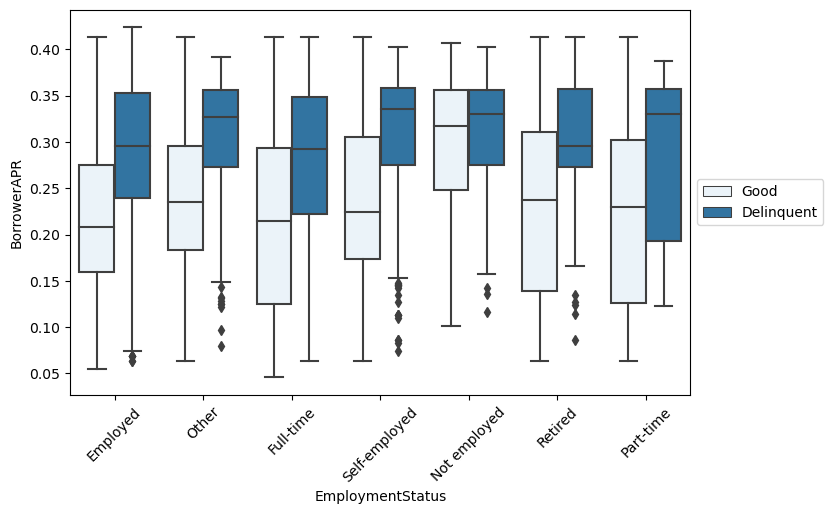

In [54]:
df_selected["loanstatus_cat"].replace({0: "Delinquent", 1: "Good"}, inplace=True)
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_selected,x='EmploymentStatus',y='BorrowerAPR',hue='loanstatus_cat',dodge=0.3, color=color_base);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

This figure confirmes all what have been said already that applied borrower rate is higher for unemployed people and delinquent loans( loans with bad records). 

### Borrower APR by Prosper Rating and Loan Status

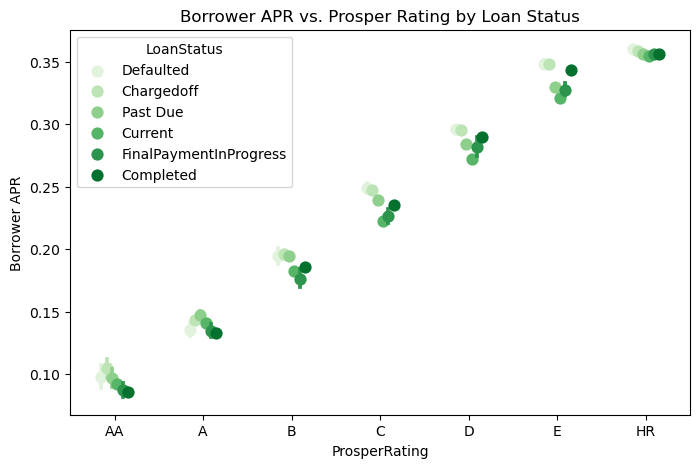

In [55]:
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = df_selected, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

_**Notes**_

For all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records).

### Loan amount by collateral and wage group

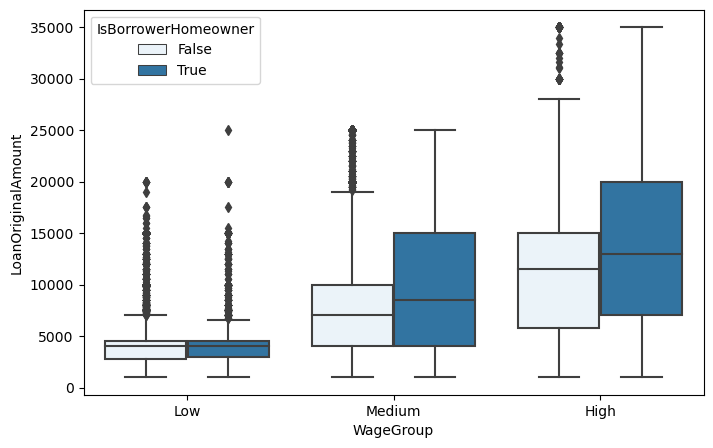

In [56]:
#plot boxplot
plt.figure(figsize = [8,5])
sb.boxplot(data = df_selected, x = 'WageGroup', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = color_base);

_**Notes**_

As shown in the previous section, having a collateral and a higher wage help getting higher loan amount.
It is clearly visible that being a home owner is a very important element to get a higher loan amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of loan and interest rate against the most explanatory determinants in this section. 
* The multivariate exploration here showed that  for people who are delinquent (defaulted,past due, charged-off payments), banks applies more restricted credit conditions (higher interest rates). Also these people have lower credit scores than people with good status.
* An other point, there is a difference between the rates applied according to the maturities. In other words, the rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the E rating (same rates for 3 and 5 years loans ) and the HR rating). This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating. Interestingly, for HR rating, only 3 years loans are observed in this dataset.
* In parallel, for all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records).
* Finally, having a collateral and a higher wage help getting higher loan amount. It is clearly visible that being a home owner is a very important element to get a higher loan amount.

### Were there any interesting or surprising interactions between features?

> I have found that the gap between rates applied for home owners and non home owners has decreased since 2011.


In [57]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0